In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from SCOPE_func import *
from fun_nearealtime_RTM import *
from main_SW_scope_nearealtime import *


In [4]:
data_dir = './GOES_data/'
sky="day"
hour = 20
if sky == "night":
    timeofday = "night"
else:
    timeofday = "day"
Sat_dir = Sat_preprocess(data_dir, hour, sat='GOES16')
sat = pd.read_hdf(
    os.path.join(data_dir+Sat_dir, "GOES_day_BON_radiance_satellite_{}.h5".format(sky)),
    'df'
)
channels = ['C{:02d}'.format(c) for c in range(1, 6 + 1)]
try:
    sat_ref = sat[channels]
except KeyError:
    sat_ref = sat['Radiance']

Filtered DataFrame saved to ./GOES_data/GOES16_site_sat_data/GOES_day_BON_radiance_satellite_20_day.h5


### mode test

In [14]:
Sun_Zen=32
local_zen=48
rela_azi=20
COD_guess=10
T_a=299
RH=61
channels=['C01', 'C02', 'C03', 'C04', 'C05', 'C06']

In [ ]:
bandmode = 'GOES' # GOES, full
COD_guess = 10
N_bundles = 10000
Rc_rtm = nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, channels,
                          file_dir=data_dir,bandmode=bandmode,N_bundles=N_bundles)
Rc_rtm

Process SpawnPoolWorker-39:
Traceback (most recent call last):
  File "/Users/dengnan/anaconda3/envs/python37/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/dengnan/anaconda3/envs/python37/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dengnan/anaconda3/envs/python37/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/dengnan/anaconda3/envs/python37/lib/python3.10/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
KeyboardInterrupt
Process SpawnPoolWorker-48:
Process SpawnPoolWorker-46:
Process SpawnPoolWorker-49:
Process SpawnPoolWorker-45:
Process SpawnPoolWorker-47:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dengnan/anaconda3/envs/python37/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/U

### macos

In [ ]:
bandmode = 'GOES' # GOES, full
COD_guess = 10
N_bundles = 10000
Rc_rtm = nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, channels,
                          file_dir=data_dir,bandmode=bandmode,N_bundles=N_bundles)
Rc_rtm

In [ ]:
bandmode = 'full'
Rc_rtm = nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, channels,
                          file_dir=data_dir,bandmode=bandmode,N_bundles=N_bundles)
Rc_rtm


### why the Intensity of spectral mode > full mode?

1. Girds: for each mode : nu is right, dnu=3, has extactly same nu for each channel
2. F_dw_os for each channel is same
3. LBL RTM model is right, changed Coeff_M according to nu.

In [ ]:
# import plotting packages
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D # 3d plot
from matplotlib import cm #color map
from matplotlib.ticker import FormatStrFormatter # set decimals in ticks
from matplotlib import rc,re
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

In [ ]:
#fdir = "/home/dengnan/Documents/git_store/SW_RTM/GOES_data/RTM_10000/" 
fdir ="./GOES_data/RTM_10000/"
bandmode = ['fullspectrum','channels']
filename = '/'+ 'Results_case2_AOD=0.1243_COD=10_kap=[10, 11, 12]_th0=32.npy'


#items = [0,1,2,6,5,4,3]
UW_sum=[]
fig = plt.figure(figsize=(8,4))
gs1 = gridspec.GridSpec(1, 1) 
gs1.update(wspace=0.1, hspace=0.15)
ax1 = fig.add_subplot(gs1[0])
nu0 = np.arange(2500, 35000, 3)
channels = ['C{:02d}'.format(c) for c in range(1, 6 + 1)]
for i in range(2):
    if bandmode[i] == 'channels':
        nu = goes_calinu(nu, channels, './GOES_data/', dnu=3)
    else:
        nu = nu0
    file = fdir + bandmode[i] + filename
    results = np.load(file, allow_pickle=True).item()
    Fuw_ctop=results.get('F_uw')
    ax1.plot(nu, Fuw_ctop, label=f'{bandmode[i]}',linewidth=1,alpha=0.9)
    if bandmode[i] == 'channels':
        print('spectral model',np.trapz(Fuw_ctop,nu))
    else:
        nu_input = goes_calinu(nu0, channels, './GOES_data/', dnu=3)
        idx = np.nonzero(np.isin(nu0, nu_input))[0]
        print('full spectral',np.trapz(Fuw_ctop[idx],nu[idx]))
    
ax1.set_xlabel(r"$\nu$")

ax1.set_ylabel(r"UW_ctop [W/m$^2$]")
ax1.grid(color='grey', linestyle=':', linewidth=0.5)

ax1.legend(loc='upper right', ncol=1, columnspacing=0.5,handlelength=1,handletextpad=0.3)

plt.show()
#fig.savefig('COD_UW_ctop_spectrum.png', dpi=300, bbox_inches='tight')

In [ ]:
data = np.genfromtxt('data/profiles/SolarTOA.csv', delimiter=',')
ref_lam = data[:, 0]  # in unit of um
ref_E = data[:, 1]  # in unit of W/m2 um
ref_E_nu = -ref_E*ref_lam**2/1e4

In [ ]:
#fdir = "/home/dengnan/SW_RTM/GOES_data/RTM/" 
fdir ="./GOES_data/RTM_10000/"
bandmode = ['channels','fullspectrum',]
filename = '/'+ 'Results_case2_AOD=0.1243_COD=10_kap=[10, 11, 12]_th0=32.npy'

#items = [0,1,2,6,5,4,3]
UW_sum=[]
fig = plt.figure(figsize=(8,4))
gs1 = gridspec.GridSpec(1, 1) 
gs1.update(wspace=0.1, hspace=0.15)
ax1 = fig.add_subplot(gs1[0])
nu0 = np.arange(2500, 35000, 3)
channels = ['C{:02d}'.format(c) for c in range(1, 6 + 1)]
nu_6c = goes_calinu(nu0, channels, './GOES_data/', dnu=3)

for channel in channels:
    for i in range(2):
        file = fdir + bandmode[i] + filename
        results = np.load(file, allow_pickle=True).item()
        Fuw_ctop=results.get('F_uw')
        nu_input = goes_calinu(nu0, [channel], './GOES_data/', dnu=3)
        if bandmode[i] == 'channels':
            idx = np.nonzero(np.isin(nu_6c,nu_input))[0]
            print(channel)
            F_6c = np.trapz(Fuw_ctop[idx],nu_input)
            print('spectral model',F_6c)
            #ax1.plot(nu, Fuw_ctop, label=f'{bandmode[i]}',linewidth=1,alpha=0.9)
            Fuw_ctop_6c = Fuw_ctop[idx]
            F_dw_os = -np.interp(-nu_input,-1e4/ref_lam, ref_E_nu) 
            print('F_dw_os',np.trapz(F_dw_os,nu_input))
        else:
            nu = nu0
            nu_input = goes_calinu(nu0, [channel], './GOES_data/', dnu=3)
            idx = np.nonzero(np.isin(nu0,nu_input))[0]
            F_ = np.trapz(Fuw_ctop[idx],nu_input)
            F_dw_os = -np.interp(-nu_input,-1e4/ref_lam, ref_E_nu) 
            print('F_dw_os',np.trapz(F_dw_os,nu_input))
            print('full spectral',F_)
            print('Relative diff', f"{(F_6c-F_) /F_*100}%")
            ax1.scatter(nu[idx], (Fuw_ctop_6c-Fuw_ctop[idx])/Fuw_ctop[idx]*100, label=f'{channel}',s=5, alpha=0.9)
ax1.set_xlabel(r"$\nu$")
ax1.set_xlim(2500,25000)
ax1.set_ylabel(r"RD full-6c mode")
ax1.grid(color='grey', linestyle=':', linewidth=0.5)

ax1.legend(loc='upper right', ncol=1, columnspacing=0.5,handlelength=1,handletextpad=0.3)

plt.show()
#fig.savefig('COD_UW_ctop_spectrum.png', dpi=300, bbox_inches='tight')

### Model Bia to Satellite

In [5]:
sat

,Time,C01,C02,C03,C04,C05,C06,COD,Sun_Zen,local_Zen,rela_azi,Site_zen,Site_dsw,direct_n,diffuse,dw_ir,temp,rh
0,2019-06-09 20:10:00,12.085018,20.091718,5.574596,0.001027,1.417462,0.332205,20.983368,32.336200,48.356936,20.419605,33.47,87.5,0.2,89.4,434.5,26.1,61.1
1,2019-06-09 20:15:00,12.448420,20.894817,5.730506,0.001027,1.426103,0.326670,22.360447,33.226959,48.356936,19.073502,34.37,131.1,0.4,132.1,432.7,26.2,60.0
2,2019-06-09 20:20:00,12.993524,21.523911,6.055318,0.001027,1.439065,0.330822,30.532583,34.125522,48.356936,17.776517,35.28,198.8,0.4,198.8,431.4,26.3,59.1
3,2019-06-09 20:25:00,13.417493,22.219933,6.185244,0.001027,1.434745,0.328054,32.412640,35.031158,48.356936,16.525063,36.19,207.5,0.4,211.3,431.7,26.5,59.0
4,2019-06-09 20:30:00,13.326643,21.831768,6.146266,0.001027,1.439065,0.328054,34.151077,35.943198,48.356936,15.315823,37.11,215.0,0.7,218.4,432.1,26.6,58.7
5,2019-06-09 20:35:00,13.084374,21.684533,5.977363,0.001027,1.434745,0.326670,32.590878,36.861030,48.356936,14.145731,38.04,220.3,0.4,223.1,431.3,26.6,57.7
6,2019-06-09 20:40:00,12.902674,21.376677,5.886416,0.001027,1.421782,0.322519,30.762096,37.784094,48.356936,13.011954,38.97,191.5,0.4,195.3,431.5,26.5,58.6
7,2019-06-09 20:45:00,12.539271,21.001897,5.782476,0.001027,1.404500,0.321135,30.361670,38.711874,48.356936,11.911872,39.90,202.7,0.4,206.2,431.3,26.4,59.2
8,2019-06-09 20:50:00,12.175869,20.412958,5.626566,0.001027,1.391537,0.319751,28.679386,39.643896,48.356936,10.843063,40.84,214.8,0.6,217.3,431.2,26.5,58.5
9,2019-06-09 20:55:00,12.024452,19.368928,5.470656,0.001027,1.374255,0.314216,29.975891,40.579722,48.356936,9.803286,41.78,209.8,0.4,213.8,430.8,26.4,58.2


In [ ]:
max_iterations = 5
epsilon = 0.001
max_COD, min_COD = 50, 0
N_bundles = 10000
Costs = []
sys = 'linux'

Rc_rtm_df = pd.DataFrame()
Sat_nor_df = pd.DataFrame()
RTM_nor_df = pd.DataFrame()

for i in range(sat_ref.shape[0]):
    Sun_Zen = sat['Sun_Zen'][i]
    T_a = sat['temp'][i] + 273.15
    RH = sat['rh'][i]
    local_zen = sat.get('Local_Ze', sat.get('local_Zen'))[i]
    rela_azi = sat['rela_azi'][i]
    COD = int(sat['COD'][i])

    Sat_nor_df = pd.concat([
        Sat_nor_df,
        min_max_nor(sat_ref.iloc[i].to_frame().T)
    ])

    Rc_rtm = nearealtime_RTM(
        Sun_Zen, local_zen, rela_azi, COD, T_a, RH,
        channels, file_dir=data_dir, bandmode='GOES', N_bundles=N_bundles
    )

    RTM_nor_df = pd.concat([
        RTM_nor_df,
        min_max_nor(Rc_rtm)
    ])

    Rc_rtm_df = pd.concat([Rc_rtm_df, Rc_rtm], ignore_index=True)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

font = 13
fontfml = 'Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

fig = plt.figure(figsize=(12, 6))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.15, hspace=0.1)

channels = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06']

for idx, ch in enumerate(channels):
    ax = fig.add_subplot(gs1[idx // 3, idx % 3])
    x = sat[ch].values
    y = Rc_rtm_df[ch].values

    model = LinearRegression().fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))

    r2 = r2_score(x, y)
    mae = np.mean(np.abs(x - y))
    rmse = np.sqrt(np.mean((x - y)**2))
    bias = np.mean(y - x)
    slope = model.coef_[0]
    intercept = model.intercept_

    min_val = min(x.min(), y.min())
    max_val = max(x.max(), y.max())

    sns.scatterplot(x=x, y=y, ax=ax, color='k', alpha=0.8, s=18)
    ax.plot([min_val, max_val], [min_val, max_val], 'r--')
    ax.plot(x, y_pred, color='blue', linestyle='-', linewidth=1.5, label='Regression')
    ax.set_xlim(min_val*0.99, max_val*1.01)
    ax.set_ylim(min_val*0.99, max_val*1.01)
    if ch == 'C04':
        ax.set_xlim(min_val-0.01, max_val*1.01)
        ax.set_ylim(min_val-0.01, max_val*1.01)

    stats_text = (
        f'{ch}\n'
        f'R² = {r2:.3f}\n'
        #f'MAE = {mae:.3f}\n'
        f'RMSE = {rmse:.3f}\n'
        #f'Bias = {bias:.3f}\n'
        f'Slope = {slope:.3f}\n'
        f'Intercept = {intercept:.3f}'
    )

    if ch == 'C04':
        ax.text(0.5, 0.45, stats_text, transform=ax.transAxes, fontsize=13, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    else:
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=13, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    if idx // 3 == 1:
        ax.set_xlabel(r'Satellite [W/(m$^2$ sr)]', fontsize=font, family=fontfml)
    else:
        ax.set_xticklabels([])
    if ch == 'C01' or ch == 'C04':
        ax.set_ylabel('RTM [W/(m$^2$ sr)]', fontsize=font, family=fontfml)

    ax.grid(color='grey', linestyle='--', linewidth=0.5)
    #ax.legend(loc='lower right', fontsize=10)

fig_dir = './figures/'
fig.savefig(fig_dir+'Bias_BON_June_GOES_RTM.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Rc_rtm_df
Rc_rtm_df.to_csv('Rc_rtm_df.csv', index=False)

## 2. COD = COD of all channel)

In [3]:
Rc_fake_real = pd.read_csv('Rc_rtm_df.csv')

In [ ]:
from scipy.optimize import curve_fit

# Define exponential model: y = -log(1 - w*x)
def exponential(x, w):
    return -np.log(1 - w * x)
def expol_func(x, a):
    return a * x**3

def min_max_nor(pd_data, sys='mac'):
    if sys == 'linux':
        sysdir = '/home/dengnan/SW_RTM/'
    elif sys == 'mac': 
        sysdir = '/Users/dengnan/Documents/git_store/Shortwave_MCRTM/'
    filedir = sysdir + 'GOES_tool/BON_ABI-L2-CODC_cropped_COD_2019/'
    results = pd.read_csv(filedir + 'min_max_values.csv', index_col=0)

    channels = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06']
    pd_new = pd_data.copy()
    for channel in channels:
        max_v = results.loc[channel, 'Max']
        min_v = results.loc[channel, 'Min']
        # min - max normalization
        pd_new[channel] = (pd_data[channel] - min_v) / (max_v - min_v)
    return pd_new
def compute_gradient_simple(Rc_rtm_df, COD_list, Rc_real, Costs,n=3,lr=10):
    """
    Linear fitting of COD, based on two nearest neighbors of Rc_real.
    """
    sorted_indices = np.argsort(Costs) # ascendent order
    nearest_indices = sorted_indices[:2]
    # Sort nearest indices to ensure consistent order
    # nearest_indices.sort()
    Rc1, Rc2 = Rc_rtm_df.iloc[nearest_indices[0]], Rc_rtm_df.iloc[nearest_indices[1]]
    COD1, COD2 = COD_list[nearest_indices[0]], COD_list[nearest_indices[1]]
    
    # Compute the gradient using the two nearest points
    w = (COD2 - COD1)/np.sum(Rc2 - Rc1)
    COD_guess = COD1 + w * np.sum(Rc_real - Rc_rtm_df.iloc[nearest_indices[0]])
    print('point1',COD1,'point2',COD2,'COD_guess',COD_guess)

    # Extrapolation check
    max_COD = max(COD1,COD2)
    if COD_guess > max_COD:
        print("> Extrapolation triggered")
        x = Rc_rtm_df.sum(axis=1).values
        y = np.array(COD_list)
        
        # Safe fitting with bounds on w
        try:
            popt, _ = curve_fit(expol_func, x, y, bounds=(1e-8, 10))
            a_fit = popt[0]
            COD_guess = expol_func(Rc_real.sum(), a_fit)
        except Exception as e:
            print(f"Exponential fit failed: {e}, traditional gradient descent used")
            lr = lr + len(COD_list)-2
            dj_dw = np.sum(Rc_rtm_df.iloc[nearest_indices[0]] - Rc_real) * COD1
            w = w - lr * 0.5*dj_dw/n  # Adjust w to avoid extrapolation
            COD_guess = COD1 + w * np.sum(Rc_real - Rc_rtm_df.iloc[nearest_indices[0]])  # fallback
            
    return COD_guess

In [74]:
aa = Rc_rtm_df[['C01','C02','C03']] - Rc_real[['C01','C02','C03']]
aa.sum(axis=1)*20/6*10

0   -18.509517
1    -5.406461
2   -10.718687
3   -16.456148
4   -16.456148
5   -16.456148
dtype: float64

In [54]:
Rc_rtm_df[['C01','C02','C03']].sum(axis=1)

0    1.162240
1    1.555332
2    1.642786
3    1.572377
4    1.555332
5    1.555332
dtype: float64

In [ ]:
max_iterations = 5
epsilon = 0.0001
max_COD, min_COD = 50, 0
N_bundles = 10000

sys = 'linux'

for i in range(3,4):  # or range(sat_ref.shape[0])
    print("--" * 20)
    print(f'Column {i} of {Rc_fake_real.shape[0]}')
    print(f"{'Iteration':<10} {'COD':<10} {'MSE':<10} {'RMSE':<10} {'Cost':<10}")
    Sun_Zen = sat['Sun_Zen'][i]
    T_a = sat['temp'][i] + 273.15
    RH = sat['rh'][i]
    local_zen = sat.get('Local_Ze', sat.get('local_Zen'))[i]
    rela_azi = sat['rela_azi'][i]
    Rc_real = min_max_nor(Rc_fake_real.iloc[i], sys=sys) #sat_ref.iloc[i], sys=sys)

    Rc_rtm_df = pd.DataFrame()
    RMSE_dic, COD_list = [], [10, 20]
    Costs = []

    for COD_guess in COD_list:
        Rc_rtm = min_max_nor(
            nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, 
                            channels, file_dir=data_dir, bandmode='GOES', N_bundles=N_bundles),
            sys=sys
        )
        Rc_rtm_df = pd.concat([Rc_rtm_df, Rc_rtm], ignore_index=True)
        SE, MSE, RMSE = loss_function(Rc_real[['C01', 'C02', 'C03']], Rc_rtm[['C01', 'C02', 'C03']])
        cost = np.sum(SE.values)/6 # 2*n_channels=12
        RMSE_dic.append(RMSE)
        Costs.append(cost)

        print(f"{'--':<10} {COD_guess:<10.2f}{MSE:<10.4f} {RMSE:<10.4f} {cost:<10.4f}")
        if cost < epsilon:
            sat.at[i, 'COD_rtm_6c'] = COD_guess
            break

    else: # for else loop
        COD_guess = compute_gradient_simple(Rc_rtm_df[['C01', 'C02', 'C03']], COD_list, Rc_real[['C01', 'C02', 'C03']], Costs)

        for j in range(max_iterations):
            if COD_guess > max_COD or COD_guess < min_COD or j == max_iterations - 1:
                COD_guess = COD_list[np.argmin(RMSE_dic)]
                sat.at[i, 'COD_rtm_6c'] = COD_guess
                break
            COD_list.append(COD_guess)
            Rc_rtm = min_max_nor(
                nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, 
                                channels, file_dir=data_dir, bandmode='GOES', N_bundles=N_bundles),
                sys=sys
            )
            Rc_rtm_df = pd.concat([Rc_rtm_df, Rc_rtm], ignore_index=True)
            SE, MSE, RMSE = loss_function(Rc_real[['C01', 'C02', 'C03']], Rc_rtm[['C01', 'C02', 'C03']])
            cost = np.sum(SE.values)/6
            RMSE_dic.append(RMSE)
            Costs.append(cost)
            print(f"Iter {j:<5} {COD_guess:<10.2f}{MSE:<10.4f} {RMSE:<10.4f} {cost:<10.4f}")

            COD_guess = compute_gradient_simple(Rc_rtm_df[['C01', 'C02', 'C03']], COD_list, Rc_real[['C01', 'C02', 'C03']], Costs)
            print('COD_guess',COD_guess)

            
            if cost < epsilon:
                sat.at[i, 'COD_rtm_6c'] = COD_guess
                break
        print(f"Final COD: {COD_guess:.4f}")

In [ ]:
max_iterations = 5
epsilon = 0.0001
max_COD, min_COD = 50, 0
N_bundles = 10000

sys = 'linux'

for i in range(5,8):  # or range(sat_ref.shape[0])
    print("--" * 20)
    print(f'Column {i} of {Rc_fake_real.shape[0]}')
    print(f"{'Iteration':<10} {'COD':<10} {'MSE':<10} {'RMSE':<10} {'Cost':<10}")
    Sun_Zen = sat['Sun_Zen'][i]
    T_a = sat['temp'][i] + 273.15
    RH = sat['rh'][i]
    local_zen = sat.get('Local_Ze', sat.get('local_Zen'))[i]
    rela_azi = sat['rela_azi'][i]
    Rc_real = min_max_nor(Rc_fake_real.iloc[i], sys=sys) #sat_ref.iloc[i], sys=sys)

    Rc_rtm_df = pd.DataFrame()
    RMSE_dic, COD_list = [], [10, 20]
    Costs = []

    for COD_guess in COD_list:
        Rc_rtm = min_max_nor(
            nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, 
                            channels, file_dir=data_dir, bandmode='GOES', N_bundles=N_bundles),
            sys=sys
        )
        Rc_rtm_df = pd.concat([Rc_rtm_df, Rc_rtm], ignore_index=True)
        SE, MSE, RMSE = loss_function(Rc_real[['C01', 'C02', 'C03']], Rc_rtm[['C01', 'C02', 'C03']])
        cost = np.sum(SE.values)/6 # 2*n_channels=12
        RMSE_dic.append(RMSE)
        Costs.append(cost)

        print(f"{'--':<10} {COD_guess:<10.2f}{MSE:<10.4f} {RMSE:<10.4f} {cost:<10.4f}")
        if cost < epsilon:
            sat.at[i, 'COD_rtm_3c'] = COD_guess
            break

    else: # for else loop
        COD_guess = compute_gradient_simple(Rc_rtm_df[['C01', 'C02', 'C03']], COD_list, Rc_real[['C01', 'C02', 'C03']], Costs)

        for j in range(max_iterations):
            if COD_guess > max_COD or COD_guess < min_COD or j == max_iterations - 1:
                COD_guess = COD_list[np.argmin(RMSE_dic)]
                sat.at[i, 'COD_rtm_3c'] = COD_guess
                break
            COD_list.append(COD_guess)
            Rc_rtm = min_max_nor(
                nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, 
                                channels, file_dir=data_dir, bandmode='GOES', N_bundles=N_bundles),
                sys=sys
            )
            Rc_rtm_df = pd.concat([Rc_rtm_df, Rc_rtm], ignore_index=True)
            SE, MSE, RMSE = loss_function(Rc_real[['C01', 'C02', 'C03']], Rc_rtm[['C01', 'C02', 'C03']])
            cost = np.sum(SE.values)/6
            RMSE_dic.append(RMSE)
            Costs.append(cost)
            print(f"Iter {j:<5} {COD_guess:<10.2f}{MSE:<10.4f} {RMSE:<10.4f} {cost:<10.4f}")

            COD_guess = compute_gradient_simple(Rc_rtm_df[['C01', 'C02', 'C03']], COD_list, Rc_real[['C01', 'C02', 'C03']], Costs)
            print('COD_guess',COD_guess)

            
            if cost < epsilon:
                sat.at[i, 'COD_rtm_3c'] = COD_guess
                break
        print(f"Final COD: {COD_guess:.4f}")

----------------------------------------
Column 5 of 12
Iteration  COD        MSE        RMSE       Cost      
File uwxyzr_COD=10_th0=37_Ta=300_RH=58.npy not found. Running RTM...
Start MonteCarlo once.
CoeffM,nu= 2509
CPU time: 83.71369528770447
--         10.00     0.0412     0.2031     0.0206    
File uwxyzr_COD=20_th0=37_Ta=300_RH=58.npy not found. Running RTM...
Start MonteCarlo once.
CoeffM,nu= 2509
CPU time: 113.6409080028534
--         20.00     0.0050     0.0709     0.0025    
point1 20 point2 10 COD_guess 25.14102529511043
> Extrapolation triggered
File uwxyzr_COD=30_th0=37_Ta=300_RH=58.npy not found. Running RTM...
Start MonteCarlo once.
CoeffM,nu= 2509
CPU time: 130.21967482566833
Iter 0     29.88     0.0018     0.0426     0.0009    
point1 29.876820064109758 point2 20 COD_guess 29.25581915763827
COD_guess 29.25581915763827
File uwxyzr_COD=29_th0=37_Ta=300_RH=58.npy not found. Running RTM...
Start MonteCarlo once.
CoeffM,nu= 2509
CPU time: 121.7747950553894
Iter 1     29.26

In [34]:
COD_guess = compute_gradient_simple(Rc_rtm_df[['C01', 'C02', 'C03']], COD_list, Rc_real[['C01', 'C02', 'C03']], Costs)

24.126107024331787 27.652334980622626


In [96]:
np.sum(Rc_rtm_df-Rc_real, axis=1)

0   -0.776160
1   -0.226386
2   -0.077909
3    0.272273
4    0.023317
5    0.008004
dtype: float64

### Comparison

In [10]:
sat['COD_rtm_6c'] = np.array([20, 22.2796, 30.583, 30.3069,
                              30.2859, 31.1619, 27.3258, 33.4937,
                              26.5731,24.9281,30.3508,24.9425])

In [ ]:
sat['COD_rtm_3c'] = np.array([20,   22, 29, 32, 37,
28.44,29, 30, 27, 28,
34.388, 27.17])

In [21]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

def calculate_errors(column1, column2):
    # Calculate the difference between the two columns
    diff = column1 - column2
    
    # Calculate the square error
    square_error = diff ** 2
    
    # Calculate the mean square error
    mse = np.mean(square_error, axis=0)
    
    # Calculate the RMSE
    rmse = np.sqrt(mse)
    
    # Calculate the R2
    r2 = r2_score(column1, column2)
    
    return square_error, mse, rmse, r2

# Example usage:
square_error, mse, rmse, r2 = calculate_errors(sat['COD_rtm_6c'], sat['COD'])
#print(f"Square Error: {square_error}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

square_error, mse, rmse, r2 = calculate_errors(sat['COD_rtm_3c'], sat['COD'])
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 9.094733634466733
RMSE: 3.0157476078854364
R2: 0.39280222330926506
MSE: 7.441195575833973
RMSE: 2.727855490276927
R2: 0.6284949664558281


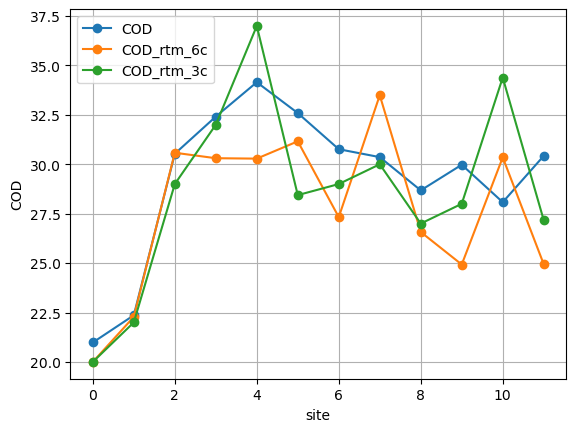

In [19]:
sat[['COD','COD_rtm_6c','COD_rtm_3c']].plot(style='o-')
plt.xlabel('site')  # Set x-axis label to COD
plt.ylabel('COD')  # Set y-axis label to Radiance
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
sat[['COD','COD_rtm','COD_rtm_6cave']].plot(style='o-')
plt.xlabel('site')  # Set x-axis label to COD
plt.ylabel('COD')  # Set y-axis label to Radiance
plt.grid(True)
plt.legend(title='Components')
plt.show()

In [ ]:
sat[['COD','COD_rtm','COD_rtm_6cave']].plot(style='o-')
plt.xlabel('site')  # Set x-axis label to COD
plt.ylabel('COD')  # Set y-axis label to Radiance
plt.grid(True)
plt.legend(title='Components')
plt.show()

In [ ]:
COD

In [ ]:
Rc_rtm_df

### Min max normalization

In [ ]:
import pandas as pd
import os

filedir = './GOES_tool/BON_ABI-L1b-RadC_cropped_Rad_2019/'


channels = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06']

# Prepare a list to store the results
results = []

for channel in channels:
    site = f'2019_June_BON_{channel}_Rad.csv'
    file_path = os.path.join(filedir, site)  # Use os.path.join for robust path creation

    try:
        df = pd.read_csv(file_path)
        df_selected = df['Radiance']

        min_value = df_selected.min()  # Calculate min and max
        max_value = df_selected.max()

        results.append({'channel': channel, 'min': min_value, 'max': max_value})  # Store in results list

    except FileNotFoundError:
        print(f"File not found: {file_path}")  # Handle missing files
    except KeyError:
        print(f"Channel {channel} not found in {file_path}") #Handle missing columns
    except Exception as e:
        print(f"An error occurred processing {file_path}: {e}") #Catch other potential errors

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

output_file = 'min_max_values.csv'  # Name of the output file
# Save the DataFrame to a CSV file
results_df.to_csv(filedir+output_file, index=False)  # index=False to prevent writing the DataFrame index
print(f"Min/Max values saved to {output_file}")

In [ ]:
# load min max values
results = pd.read_csv(filedir + 'min_max_values.csv')
results

In [ ]:
def min_max_nor(pd_data, sys='mac'):
    if sys == 'linux':
        sysdir = '/home/dengnan/SW_RTM/'
    elif sys == 'mac': 
        sysdir = '/Users/dengnan/Documents/git_store/Shortwave_MCRTM/'
    filedir = sysdir + 'GOES_tool/BON_ABI-L2-CODC_cropped_COD_2019/'
    results = pd.read_csv(filedir + 'min_max_values.csv', index_col=0)

    channels = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06']
    pd_new = pd_data.copy()
    for channel in channels:
        max_v = results.loc[channel, 'Max']
        min_v = results.loc[channel, 'Min']
        # min - max normalization
        pd_new[channel] = (pd_data[channel] - min_v) / (max_v - min_v)

    return pd_new

### gradient algorithm

In [ ]:
def compute_gradient_simple(Rc_rtm_df, COD_list, Rc_real, RMSE_df, RMSE):
    """
    Linear fitting of COD, based on two nearest neighbors of Rc_real.
    """

    sorted_indices = np.argsort(RMSE_df['C02'].values) # ascendent order
    nearest_indices = sorted_indices[:2]
    # Sort nearest indices to ensure consistent order
    # nearest_indices.sort()
    Rc1, Rc2 = Rc_rtm_df.iloc[nearest_indices[0]], Rc_rtm_df.iloc[nearest_indices[1]]
    COD1, COD2 = COD_list[nearest_indices[0]], COD_list[nearest_indices[1]]
    # Compute the gradient using the two nearest points
    gradient = (Rc2 - Rc1)/(COD2 - COD1)
    # Calculate the COD at Rc_real using the linear approximation
    if RMSE < 5:
        learningrate = RMSE
        COD = COD1 + learningrate * gradient/abs(gradient)
        print(COD['C02'])
    else:
        COD = COD1 + (Rc_real - Rc1) / gradient

    # Debug logging
    #print(f"Debug: Gradient:\n {gradient}, COD_estimate:\n {COD}")

    COD_guess = round(float(COD['C02']), 2)
    if COD_guess <= 0:
        print("COD must be greater than 0, but got {}.".format(COD_guess))
    return COD_guess, COD

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def compute_cod_regression(Rc_rtm_df, COD_list, Rc_real, component='C02'):
    # Convert COD_list and Rc_rtm_df for linear regression
    COD_array = np.array(COD_list).reshape(-1, 1)
    
    # Error values for the desired component
    error_array = Rc_rtm_df[component].values - Rc_real[1]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(COD_array, error_array)
    
    # Calculate the updated COD estimation based on predicted zero error point
    # error = COD * slope + intercept -> COD = (0 - intercept) / slope
    slope = model.coef_[0]
    intercept = model.intercept_

    COD_guess = -intercept / slope

    # Debug statement
    #print(f"Debug: Linear Regression on {component}: Slope = {slope}, Intercept = {intercept}, New COD_guess = {COD_guess}")

    return round(float(COD_guess), 2)

# Example usage:

# Assuming Rc_rtm_df, COD_list, and Rc_real are already defined in context
new_cod_guess = compute_cod_regression(Rc_rtm_df, COD_list, Rc_real, 'C02')
print(f"Updated COD Guess: {new_cod_guess}")

In [ ]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import pandas as pd

def compute_cod_spline_fit(Rc_rtm_df, COD_list, Rc_real, component='C02'):
    # Convert COD_list and Rc_rtm_df for spline interpolation
    COD_array = np.array(COD_list)
    
    # Error values for the desired component
    error_array = Rc_rtm_df[component].values - Rc_real[1]
    
    # Initialize and fit the univariate spline
    spline_model = UnivariateSpline(COD_array, error_array, s=1)
    
    # Calculate the updated COD estimation based on the predicted zero error point
    # We need to find the point where the error is zero using the spline
    root_candidates = spline_model.roots()

    # Check if there are valid roots, otherwise handle accordingly
    if len(root_candidates) > 0:
        COD_guess = root_candidates[0]
    else:
        COD_guess = np.nan  # or handle appropriately

    # Debug statement
    print(f"Debug: Spline roots for {component}: {root_candidates}, New COD_guess = {COD_guess}")

    return round(float(COD_guess), 2) if not np.isnan(COD_guess) else None

# Example usage:

# Assuming Rc_rtm_df, COD_list, and Rc_real are already defined in context
new_cod_guess = compute_cod_spline_fit(Rc_rtm_df, COD_list, Rc_real, 'C02')
print(f"Updated COD Guess: {new_cod_guess}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Rc_rtm_df, COD_list, and Rc_real are already defined

# Add the 'COD' column to the DataFrame
Rc_rtm_plot = (Rc_rtm_df.copy())
Rc_rtm_plot['COD'] = np.array(COD_list)

# Set the x-axis to use the 'COD' column explicitly
ax = Rc_rtm_plot[['C02','COD']].plot(x='COD', style='-o', figsize=(6, 4), title='Radiance vs COD')  
# 'o-' indicates circles for markers and lines for connection
#ax.axhline(Rc_real[1], color='red', linestyle='--', label='Reference Line')
plt.xlabel('COD')  # Set x-axis label to COD
plt.ylabel('Radiance')  # Set y-axis label to Radiance
plt.grid(True)
plt.legend(title='Components')
plt.show()

# Analysis :Given Zenith, COD impact on per solid angle Rad 

In [ ]:
Sun_Zen, local_zen, rela_azi, COD_guess, T_a, RH, channels

In [ ]:
Sun_Zen = np.array([0,15,30,45,60])
COD = np.arange(0,50,5.0)
Rad = []
for theta in Sun_Zen:
    for COD_guess in COD:
        Rc_rtm = nearealtime_RTM(theta, local_zen, rela_azi, COD_guess, T_a, RH, channels, file_dir=data_dir)
        Rad.append(Rc_rtm['C02'].values)
    plt.plot(COD,Rad,label=f"{theta}")
plt.legend(title='Zenith')
plt.show()

In [ ]:
Sun_Zen = np.array([0,15,30,45,60])
COD = np.arange(0,50,5.0)
plt.figure(figsize=(10, 6))

for theta in Sun_Zen:
    Rad = []
    for COD_guess in COD:
        Rc_rtm = nearealtime_RTM(theta, local_zen, rela_azi, COD_guess, T_a, RH, channels, file_dir=data_dir)
        Rad.append(Rc_rtm['C02'].values)
    plt.plot(COD, Rad, label=f"{theta}°")
plt.legend(title='Zenith')
plt.xlabel('Cloud Optical Depth (COD)')
plt.ylabel('Radiance')
plt.show()

In [ ]:
Sun_Zen = np.array([0,15,30,45,60])
COD = np.arange(0,50,5.0)
plt.figure(figsize=(10, 6))

for theta in Sun_Zen:
    Rad = []
    for COD_guess in COD:
        Rc_rtm = nearealtime_RTM(theta, local_zen, rela_azi, COD_guess, T_a, RH, channels, file_dir=data_dir)
        Rad.append(Rc_rtm['C02'].values)
    plt.plot(COD, Rad, 'o-', label=f"{theta}°")
plt.legend(title='Zenith')
plt.xlabel('Cloud Optical Depth (COD)')
plt.ylabel(r'Radiance [W/(m$^2$ sr)]')
plt.title(f'Site BON in Solid angle {np.round(local_zen,2)}, {np.round(rela_azi,2)}')
plt.show()